# Pregunta 2 

El set de datos 2 contiene información respecto a zonas de exclusión de pesca en las costas de la octava región. Se le solicita a usted desarrollar un modelo de clasificación con el cual poder predecir si un barco se encuentra o no en la zona de exclusión. Nuevamente considere que las clases están desbalanceadas y que se espera que usted utilice 80% de los datos para entrenar y el 20% restante para testear. Además, presente una matriz de confusión y el f1-score. Finalmente, una restricción fuerte de este ejercicio es que todo debe estar programado en tensorflow 2 y desarrollado el mismo Colab notebook.


In [1]:
# Importando librerías para analizar y trabajar con el dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando dataset
data = pd.read_csv('dataset2.csv')

In [3]:
# ¿Cómo se ven los datos?
data.head()

,x,y,condition
0,7391.708670,5.898348e+06,1
1,48438.984252,5.946210e+06,1
2,-2768.592216,5.946243e+06,1
3,41644.498119,5.915993e+06,1
4,53467.799848,5.953068e+06,1


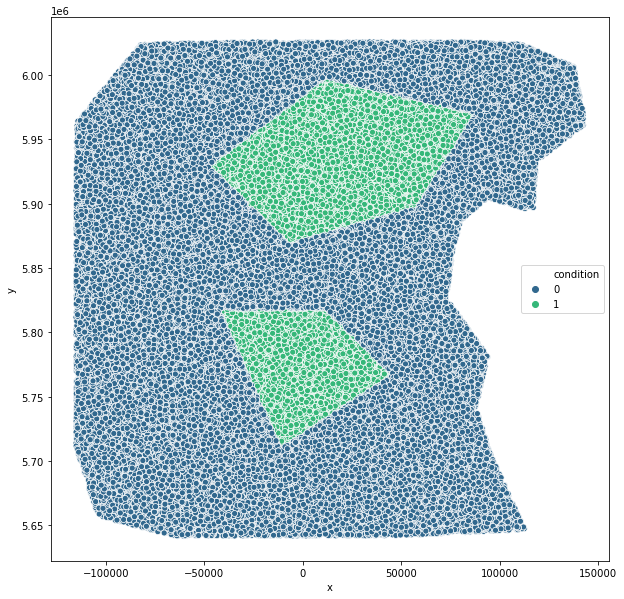

In [4]:
# Visualizando los datos
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',data=data,hue='condition',palette='viridis')

#### Podemos visualizar en el gráfico de arriba que hay dos sectores de interés en nuestros datos (puntos en verde). Queremos que nuestro modelo pueda determinar si un punto está dentro de aquellas áreas. El approach a tomar para resolver este problema es el de tener un modelo que aprenda a determinar si un punto está en sector superior y otro en el sector inferior. Luego, tomando el ouput de ambos modelos, se determina si el punto está en alguno de ambos sectores de interés.

#### Para esto, dividiremos el set de datos en 2 y ajustaremos un modelo para cada set.

In [5]:
# Dataset para el sector de abajo
data_down = data.sort_values('y',ascending=False).iloc[40823:]

# Dataset para el sector de abajo
data_up = data.sort_values('y',ascending=False).iloc[:40823]

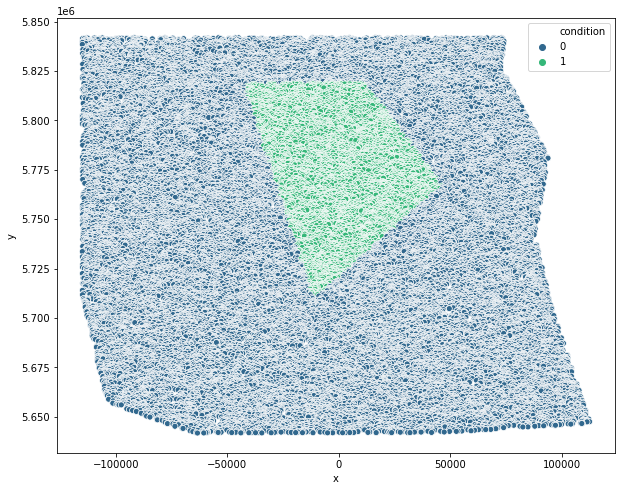

In [6]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='x',y='y',data=data_down, hue='condition',palette='viridis')

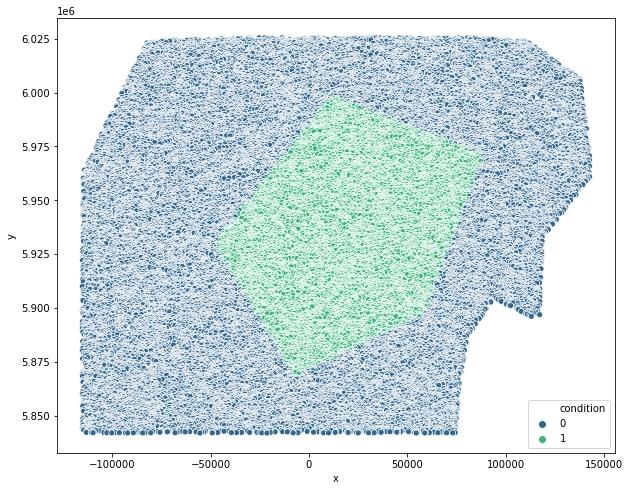

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='x',y='y',data=data_up, hue='condition',palette='viridis')

In [8]:
# Obteniendo las matrices para trabajar los modelos
X_up = data_up.drop('condition',axis=1).values
y_up = data_up['condition'].values

X_down = data_down.drop('condition',axis=1).values
y_down = data_down['condition'].values

In [9]:
# Importando librerías para crear el modelo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creando los sets de entrenamiento y prueba
X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(X_up, y_up, test_size=0.2, random_state=42)
scaler_up = MinMaxScaler()
X_up_train = scaler_up.fit_transform(X_up_train)
X_up_test = scaler_up.transform(X_up_test)

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.2, random_state=42)
scaler_down = MinMaxScaler()
X_down_train = scaler_down.fit_transform(X_down_train)
X_down_test = scaler_down.transform(X_down_test)

C:\Users\Francisco\AppData\Local\Continuum\anaconda3\envs\tf-mcbi\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Francisco\AppData\Local\Continuum\anaconda3\envs\tf-mcbi\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Francisco\AppData\Local\Continuum\anaconda3\envs\tf-mcbi\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

In [10]:
#### MODELO PARA SECTOR DE ARRIBA

model_up = Sequential()

# Input Layer
model_up.add(Dense(5,input_shape=(2,), activation='relu'))

# Hidden Layers
model_up.add(Dense(5, activation='relu'))
model_up.add(Dense(5, activation='relu'))
model_up.add(Dense(5, activation='relu'))
model_up.add(Dense(5, activation='relu'))

# Ouput Layer
model_up.add(Dense(1,activation='sigmoid'))

# Compiler
model_up.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['binary_accuracy'])

# Fitting
model_up.fit(x = X_up_train, y = y_up_train, validation_data = (X_up_test, y_up_test),epochs=400,verbose=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [ ]:
#### MODELO PARA SECTOR DE ABAJO
model_down = Sequential()

# Input Layer
model_down.add(Dense(5,input_shape=(2,), activation='relu'))

# Hidden Layers
model_down.add(Dense(5, activation='relu'))
model_down.add(Dense(5, activation='relu'))
model_down.add(Dense(5, activation='relu'))
model_down.add(Dense(5, activation='relu'))

# Ouput Layer
model_down.add(Dense(1,activation='sigmoid'))

# Compiler
model_down.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['binary_accuracy'])

# Fitting
model_down.fit(x = X_down_train, y = y_down_train, validation_data = (X_down_test, y_down_test), epochs=400,verbose=False)

In [ ]:
losses_up = pd.DataFrame(model_up.history.history)
losses_down = pd.DataFrame(model_down.history.history)

In [ ]:
losses_up.plot()

In [ ]:
losses_down.plot()

In [ ]:
# Realizando predicciones de ambos modelos con los set de prueba

predictions_up = model_up.predict_classes(X_up_test)
predictions_down = model_down.predict_classes(X_down_test)

In [ ]:
# Importando librerías para metricas f1-score y confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print('MODELO PARA SECTOR DE ARRIBA')
print(classification_report(y_up_test,predictions))

In [ ]:
confusion_matrix(y_up_test,predictions)

In [ ]:
print('MODELO PARA SECTOR DE ABAJO')
print(classification_report(y_down_test,predictions_2))

In [ ]:
print(confusion_matrix(y_down_test,predictions_2))

#### Podemos notar que los f1-score para ambos modelos son bastante elevados, lo que permite intuir que los modelos están ajustando bien. Esto también lo podemos comprobar al ver que nuestras Confusion matrices están entregando pocos Falsos positivos (error tipo I) y Falsos negativos (error tipo II).

#### Por último podemos tomar la predicción de ambos modelos y obtener una predicción final. La lógica de esta última parte es similar a tener una red 'OR'.

In [ ]:
final_prediction = np.zeros(len(predictions))
for i in range(len(predictions)):
    if predictions[i] or predictions_2[i] == 1:
        final_prediction[i] = 1
    else: pass

final_prediction